<a href="https://colab.research.google.com/github/minjeon99/ESAA-10th-OB/blob/Week1/w1_fri_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4. 모델 훈련**

- 지금까지는 머신러닝 모델과 훈련 알고리즘을 블랙박스처럼 취급했으나

  어떻게 작동하는지를 이해하면 적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 하이퍼 파라미터를 빠르게 찾을 수 있음
  - 신경망(nueral network) 이해와 구축, 훈련에 필수적
1. 선형 회귀 훈련의 2가지 방법
  
  (1) 직접 계산할 수 있는 공식 -> 훈련 세트에 가장 잘 맞는 모델 파라미터(비용 함수 최소화)를 해석적으로 구하기
  
  (2) 반복적인 최적화 방식 경사하강법(GD) -> 모델 파라미터를 바꾸면서 비용 함수를 훈련 세트에 대해 최소화
    - 결국 1번과 동일한 파라미터로 수렴
    - 경사하강법의 변종: 배치/미니배치/확률적 경사하강법
2. 비선형 데이터셋에 훈련시킬 수 있는 다항 회귀
  - 선형 회귀보다 파라미터가 많아서 과대적합되기 쉬움
  - 학습 곡선을 사용한 모델 과대적합 감지 방법 배우기
3. 분류 작업에 사용되는 모델: 로지스틱 회귀, 소프트맥스 회귀

## **4.1 선형 회귀**

- 선형 모델: 입력 특성의 가중치 합과 편향(절편) 상수를 더해 예측 만들기

  $\widehat{y}=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$
  - $\widehat{y}$: 예측값
  - $n$: 특성 수
  - $x_i$: i번째 특성값
  - $\theta_j$: j번째 모델 파라미터
- 벡터 형태
  
  $\widehat{y}=h_\theta(x)=\theta \cdot x$
  - $\theta$ : 편향 $\theta_0$와 $\theta_n$까지의 특성 가중치를 담은 모델의 파라미터 벡터
  - $x$: $x_0$에서 $x_n$까지 담은 샘플의 특성 벡터
    - $x_0$는 항상 1
  - $\theta \cdot x$: 벡터 $\theta$와 $x$의 dot product
  - $h_\theta(x)$: 모델 파라미터 $\theta$를 사용한 가설 함수

- 모델 훈련시키기: 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터 설정
  - 성능 측정 지표: 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정
    - 회귀에서는 주로 RMSE(평균 제곱근 오차)
    
      => RMSE를 최소화하는 ***θ*** 찾기
    - MSE(평균 제곱 오차)를 최소화하는 것과 같은 결과
  - MSE 계산 식
  $$MSE(X,h_\theta)=\frac{1}{m}\sum^m_{i=1}(\theta^Tx^{(i)}-y^{(i)})^2$$

### **4.1.1 정규방정식**

- 비용함수를 최소화하는 Θ를 찾기 위한 해석적인 방법 = 결과를 바로 얻을 수 있는 수학 공식
  
  = **정규방정식(normal equation)**

  - $\widehat\theta=(X^TX)^{-1}X^Ty$
    - $\widehat\theta$: 비용함수를 최소화하는 Θ
    - $y$: 타깃 벡터

In [ ]:
# 공식 테스트하기
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1) # y = 4 + 3X + 가우시안잡음

- 무작위로 생성한 선형 데이터셋

  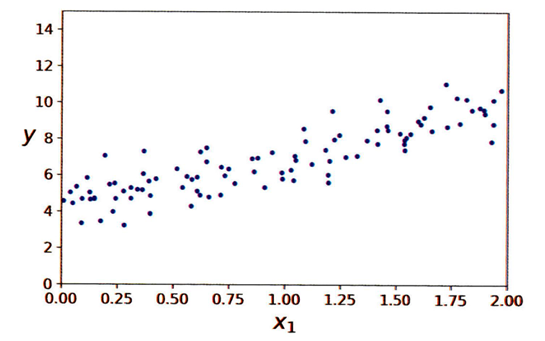

- 정규방정식을 사용해 $\widehat{\theta}$ 계산하기
  - `np.linalg`(선형대수 모듈)의 `inv()`를 사용해 역행렬 계산 -> `dot()`을 사용해 행렬 곱셈

In [ ]:
X_b = np.c_[np.ones((100,1)),X] # 모든 샘플에 x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

- `np.c_[]`: 두 배열을 열 방향 합치기

In [ ]:
theta_best

array([[4.20953485],
       [2.73441276]])

- 4, 3을 기대했으나,
  
  비슷하지만 잡음 때문에 정확히 재현은 X

In [ ]:
# theta_hat을 사용한 예측
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 x0 = 1 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.20953485],
       [9.67836037]])

- 기대한 값: 4, 10

(0.0, 2.0, 0.0, 15.0)

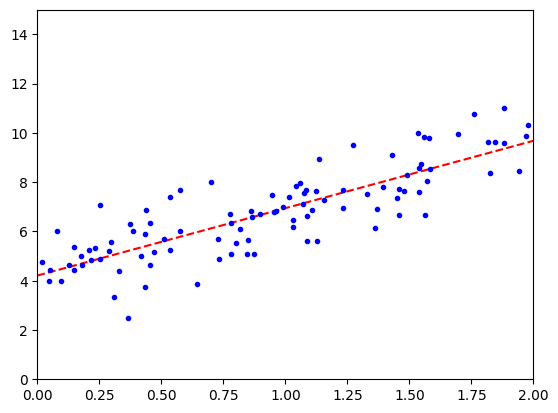

In [ ]:
# 모델의 예측 값 그래프 그리기

import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r--')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])

In [ ]:
# 사이킷런에서 선형 회귀 수행하기

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.20953485]), array([[2.73441276]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.20953485],
       [9.67836037]])

- `LinearRegression` 클래스: `scipy.linalg.lstsq()` 기반
  - 최소제곱법 이용

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.20953485],
       [2.73441276]])

- $\widehat \theta=X^+y$ 계산
  - $X^+$: X의 유사역행렬(pseudoinverse), 무어-펜로즈 역행렬
  - `np.linalg.pinv()`: 유사역행렬 직접 계산

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.20953485],
       [2.73441276]])

- 유사역행렬: 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산
  - SVD: 훈련 세트 행렬 X를 3개의 행렬 곱셈 $U\Sigma V^T$로 분해
  - 유사역행렬: $X^+=V\Sigma^+ U^T$로 계산
    - $\Sigma^+$를 계산하기 위해 Σ 먼저 계산
    
      -> 임곗값보다 작은 모든 수를 0으로 바꾸기
      
      -> 0이 아닌 모든 값을 역수로 치환
      
      -> 전치 행렬 구하기
    - 정규방정식 계산보다 효율적
    - 극단적인 경우도 처리 가능
      - m<n이거나, 중복된 특성이 있어 $X^TX$의 역행렬이 없다면 정규방정식 작동 X
      - 유사역행렬은 항상 구할 수 O

### **4.1.2 계산 복잡도**

- 정규방정식: (n+1)x(n+1) 크기의 $X^TX$의 역행렬 계산
  - 계산 복잡도: $O(n^{2.4})$~$O(n^3)$
- 사이킷런의 LinearRegression 클래스가 사용하는 SVD: 약 $O(n^2)$
- 선형 회귀 모델은 예측이 매우 빠름
  - 예측 계산 복잡도는 샘플 수와 특성 수에 선형적
  - 샘플이 2배로 늘어나면 걸리는 시간도 거의 2배 증가

## **4.2 경사 하강법**

- 경사하강법(Gradient Descent): 비용 함수를 최소화하기 위해 반복해서 파라미터 조정
  - 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
1. 파라미터 벡터 Θ를 임의의 값으로 시작(random initialization) -> 비용 함수의 현재 gradient 계산
2. 한 번에 조금씩 비용 함수(ex. MSE)가 감소하는 방향(gradient 감소하는 방향)으로 진행
3. gradient가 0이 되면 최솟값 도달 => 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상

  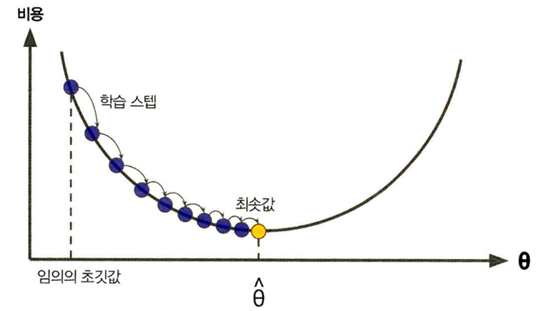


- 경사하강법에서 중요한 파라미터인 스텝의 크기: 학습률(learning rate) 하이퍼파라미터로 결정
  - 학습률이 너무 작을 때: 알고리즘이 수렴하기 위해 반복을 많이 진행 => 시간 오래 걸림

    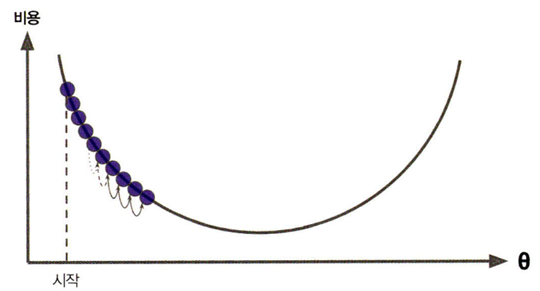
  - 학습률이 너무 너무 클 때: 골짜기를 가로질러 반대편으로 건너뛰게 되어 더 높은 곳으로 올라갈 수도 O, 더 큰 값으로 발산

    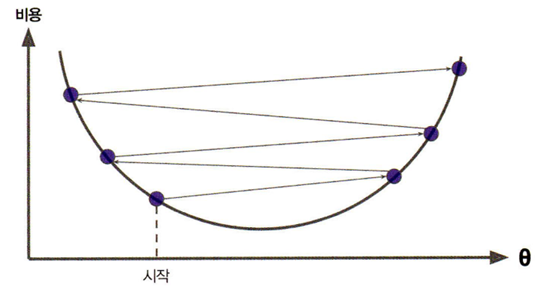

- 모든 비용 함수가 매끈한 그릇과 같지는 X
  - 패인 곳, 산마루, 평지 등 특이한 지형이 있으면 최솟값으로 수렴하기 매우 어려움
- 경사하강법의 2가지 문제점
  1. 지역 최솟값 수렴
  2. 평탄한 지역을 지나기 위해 오랜 시간 소요 => 전역 최솟값 도달 X

    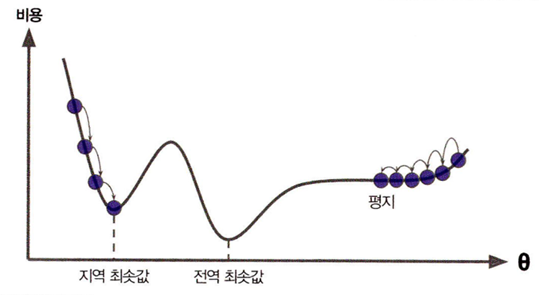
- 선형 회귀를 위한 MSE 비용 함수: 볼록 함수
  - 지역 최솟값 X, 하나의 전역 최솟값만 존재
  - 연속함수, 기울기가 갑자기 변하지 X

    => 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장

- 비용 함수는 그릇 모양을 하고 있지만, 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있음

  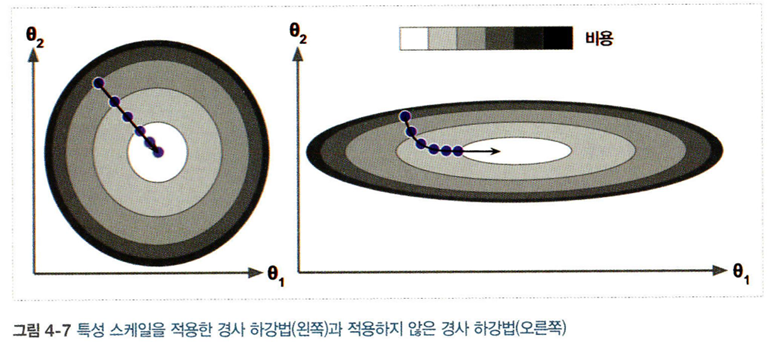
  - 동일한 스케일: 경사 하강법 알고리즘이 최솟값으로 곧장 직행 => 빠르게 도달
  - 다른 스케일: 처음에는 전역 최솟값 방향에 거의 직각으로 향하다가 -> 평편한 골짜기를 길게 돌아서 나감

    => 최솟값에는 도달하나, 오랜 시간 소요
- 모델 훈련은 비용함수를 최소화하는 모델 파라미터 조합을 찾는 일
  - 파라미터 공간에서 찾기
  - 모델의 파라미터 수가 많을수록 차원이 커지고 검색이 어려워짐

### **4.2.1 배치 경사 하강법**

- 경사 하강법을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 gradient 계산
  - 편도함수: $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산

    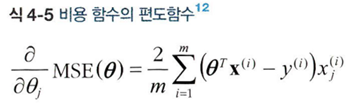
  - 편도함수를 각각 계산하는 대신 한꺼번에 계산하는 방법

    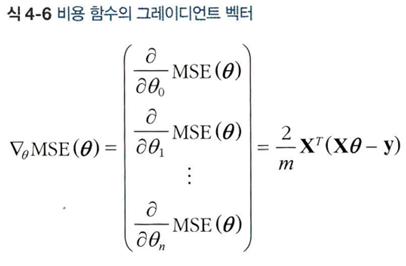

- 위로 향하는 gradient vector가 구해지면 반대 방향인 아래로 이동
  - Θ에서 $\nabla_\theta MSE(\theta)$ 빼기
  - 내려가는 스텝의 크기를 결정하기 위해 gradient vector에 학습률 η 곱하기

    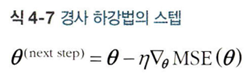

In [ ]:
# 알고리즘 구현
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

theta

array([[4.20953485],
       [2.73441276]])

- 정규방정식으로 찾은 것과 동일
- 학습률 η 바꿔보기 (점선: 시작점)

  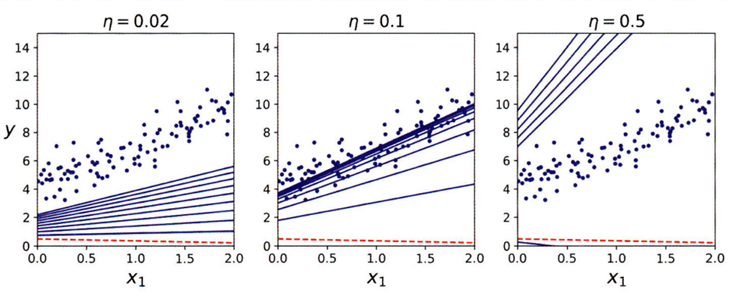
  1. η=0.02
    - 너무 낮은 학습률
    - 최적점에는 도달하지만, 오랜 시간 소요
  2. η=0.1
    - 적당한 학습률
    - 몇 번의 반복만으로 최적점 수렴
  3. η=0.5
    - 너무 높은 학습률
    - 알고리즘이 널뛰면서, 최적점에서 점점 멀어져 발산

- 적절한 학습률 찾기: grid search 사용
  - 수렴하는 데 너무 오래 걸리는 모델 막기 위해 반복 횟수 제한
  - 반복 횟수 지정
    - 너무 작으면 최적점 도달 전 알고리즘 중단
    - 너무 크면 모델 파라미터가 변하지 않는 동안 시간 낭비

    => 반복 횟수 크게 지정 후,
      
      gradient vector가 아주 작아지면(벡터의 norm이 허용오차 ε보다 작아지면) 경사 하강법이 최솟값 도달 -> 중지

### **4.2.2 확률적 경사 하강법**

- **배치 경사 하강법**의 가장 큰 문제: 매 스텝에서 전체 훈련 세트를 사용해 gradient 계산
  - 훈련 세트가 커지면 매우 느려짐
- **확률적 경사 하강법**: 매 스텝에서 한 개의 샘플을 무작위로 선택 -> gradient 계산

  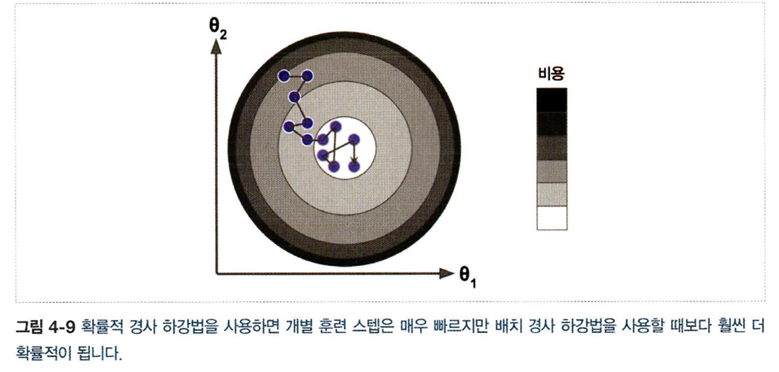
  - 알고리즘 처리 속도 빠름
  - 매 반복에서 하나의 샘플만 메모리에 올림 => 매우 큰 훈련 세트도 O
  - 단점: 확률적(=무작위) => 배치 경사 하강법보다 훨씬 불안정
    - 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소
    - 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만, 최적치는 아님
    - 비용 함수가 불규칙할 경우에는, 지역 최솟값을 건너뛸 수 있도록 도와줌 => 배치 경사 하강법보다 전역 최솟값 찾을 가능성 높음
- 무작위성은 지역 최솟값에서 탈출시켜주지만, 전역 최솟값에 다다르지 못하게 한다는 점에서는 좋지 않음(딜레마)
  - 해결 방법: 학습률을 점진적으로 감소
    - 시작할 때 큰 학습률(수렴 빠르게, 지역 최솟값에 빠지지 않게 함)
    - 점차 작게 줄여서 전역 최솟값에 도달하게 함
    - simulated annealing(담금질 기법) 알고리즘과 유사
    - 학습 스케쥴: 매 반복에서 학습률을 결정하는 함수

In [ ]:
# 간단한 학습 스케줄을 사용한 확률적 경사 하강법의 구현
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.16408833],
       [2.7712777 ]])

- 한 반복에서 m(훈련 샘플 수)번 되풀이, 이때 각 반복 = epoch
- 배치 경사 하강법 코드가 전체 훈련세트에 대해 1000번 반복하는 동안,
  
  확률적 경사 하강법은 훈련 세트에서 50번만 반복하고도 좋은 값 도달
- 첫 20개 스텝

  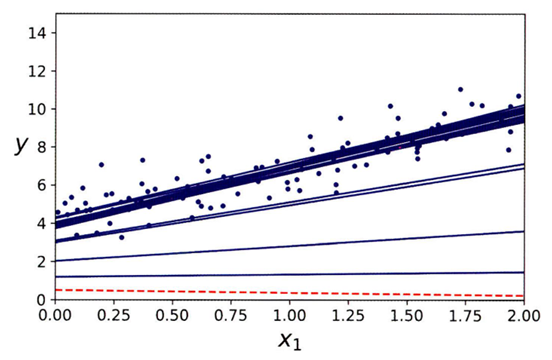

- 샘플을 무작위로 선택하므로 어떤 샘플이 한 에포크에서 여러 번 선택되거나, 어떤 샘플이 선택되지 못할 수도 O
  - 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 하나씩 선택 -> 다음 에포크에서 다시 섞기
    - 그러나, 이 방식의 경우 보통 더 늦게 수렴
- 사이킷런에서 SGD 방식 선형 회귀: `SGDRegressor` 클래스

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.12989089]), array([2.71605219]))

- 정규방정식으로 구한 것과 매우 비슷한 값 얻음

### **4.2.3 미니배치 경사 하강법**

- 각 스텝에서 전체 훈련 세트(like 배치 경사 하강법)나 하나의 샘플(like 확률적 경사 하강법)을 기반으로 gradient 계산 X
  - 미니 배치(임의의 작은 샘플)에 대해 gradient 계산
  - 장점: 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상
- SGD보다 덜 불규칙하게 움직임
  - SGD보다 최솟값에 더 가까이 도달
  - 지역 최솟값에서 빠져나오기는 더 힘들 수도 있음(선형 회귀와 달리 지역 최솟값이 문제 되는 경우)
- 세 가지 경사 하강법 알고리즘이 훈련 과정 동안 파라미터 공간에서 움직인 경로

  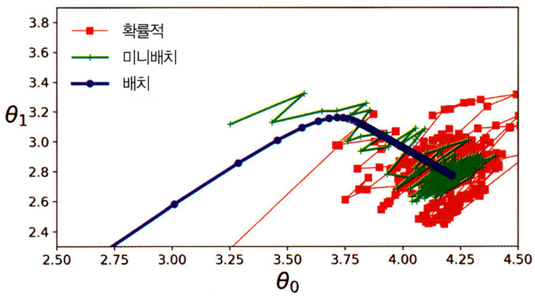
  - 모두 최솟값 근처에는 도달
  - 배치 경사 하강법: 실제 최솟값에서 멈춤
  - 확률적/미니배치 경사 하강법: 최솟값 근처에서 맴돌고 있음
  - 그러나, 배치 경사 하강법은 매 스탭 많은 시간 소요
  
    & 확률적/미니배치 경사 하강법도 적절한 학습 스케줄 사용 시 최솟값 도달 가능
- 선형 회귀를 사용한 알고리즘 비교

  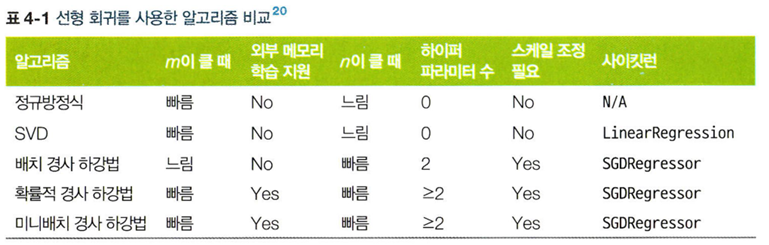

##**4.3 다항 회귀**

- 비선형 데이터 학습에도 선형 모델을 사용할 수 있음
  - 각 특성의 거듭제곱을 새로운 특성으로 추가 => 확장된 특성을 포함한 데이터셋에 선형 모델 훈련

  = **다항 회귀(polynomial regression)**

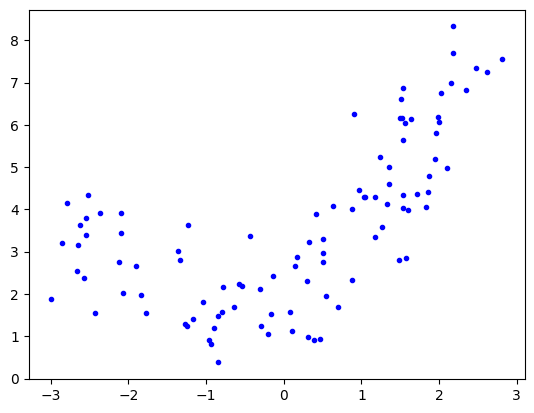

In [ ]:
# 2차방정식으로 비선형 데이터 생성

m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
plt.plot(X,y,'b.')

- 직선은 이 데이터에 잘 맞지 않을 것
- PolynomialFeatures를 사용해 훈련 데이터 변환
  - 훈련 세트에 있는 각 특성을 제곱(2차 다항)하여 새로운 특성으로 추가 (여기서는 특성 1개 추가)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.54124094])

In [ ]:
X_poly[0]

array([-2.54124094,  6.4579055 ])

- X_poly: 원래 특성 X와 이 특성의 제곱을 포함

In [ ]:
# 확장된 훈련 데이터에 Linear Regression 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.2326616]), array([[0.911539 , 0.4839631]]))

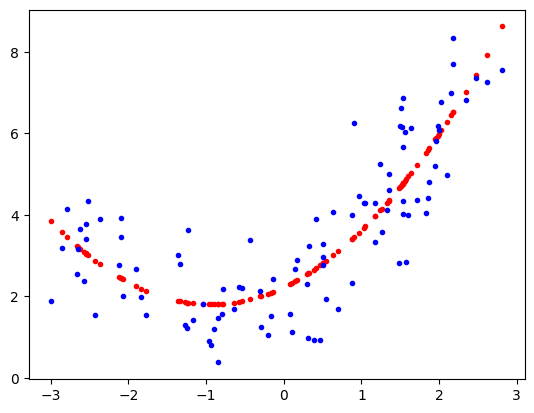

In [ ]:
y_pred = lin_reg.intercept_[0] + lin_reg.coef_[0][0]*X + lin_reg.coef_[0][1]*X**2
plt.plot(X, y_pred, 'r.')
plt.plot(X, y, 'b.')

- 원래 함수: $y=0.5x^2_1+1.0x_1+2.0+(가우시안 잡음)$
- 예측된 모델: $y=0.48x^2_1+0.9x_1+2.23$
- 특성이 여러 개일 때, 다항 회귀는 이 특성 사이의 관계를 찾을 수 있음
  - PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항 추가하기 때문
    - ex) 특성: a, b / degree=3

      -> $a^2$, $a^3$, $b^2$, $b^3$ + $ab$, $a^2b$, $ab^2$ 까지 추가

## **4.4 학습 곡선**

- 고차 다항 회귀를 적용하면 보통의 선형 회귀보다 훨씬 더 훈련 데이터에 잘 맞추려 함
- 차수에 따른 결과 비교

  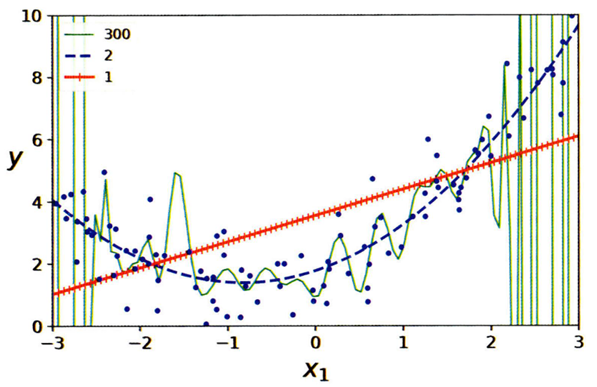

- 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합
- 선형 모델은 과소적합
- 2차 다항 회귀가 가장 일반화 잘 된 모델

  => 얼마나 복잡한 모델을 사용할지 결정할 방법?
  
  모델이 과대적합/과소적합되었는지 아는 방법?
1. 모델의 일반화 성능 추정을 위한 교차 검증 사용
  - 훈련 데이터: 성능 Good <-> 교차 검증 점수: Bad => 과대적합
  - 양쪽에서 모두 Bad => 과소적합
2. 학습 곡선
  - 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 표현
  - 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='훈련 세트')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증 세트')
  plt.xlabel('train set size')
  plt.ylabel('RMSE')

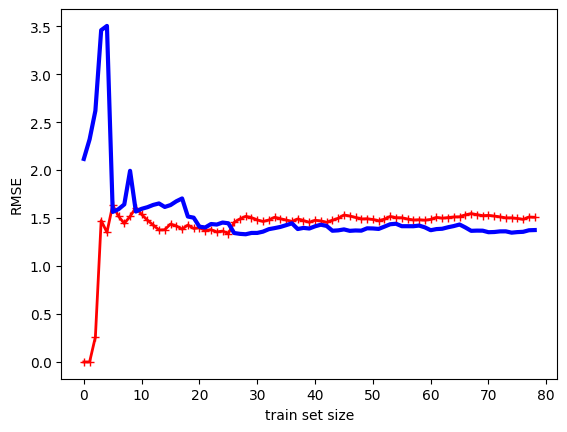

In [ ]:
# 단순 선형 회귀 모델(직선)의 학습 곡선

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

- 전형적인 과소적합 모델의 모습: 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 가까이 근접
  - 훈련 데이터 성능
    - 0에서 시작하므로 1~2개의 샘플에서는 완벽하게 작동
    - 샘플이 추가됨에 따라 잡음&비선형 => 완벽히 학습하기 불가능
    - 곡선이 어느정도 평편해질 때까지 오차 계속 상승
    - 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지 X
  - 검증 데이터 세트
    - 적은 수의 훈련 샘플: 제대로 일반화될 수 없어 초기 검증 오차 매우 큼
    - 훈련 샘플 추가됨에 따라 학습하며 검증 오차 천천히 감소
    - 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해짐 => 훈련 세트 그래프와 가까워짐

(0.0, 80.0, 0.0, 3.5)

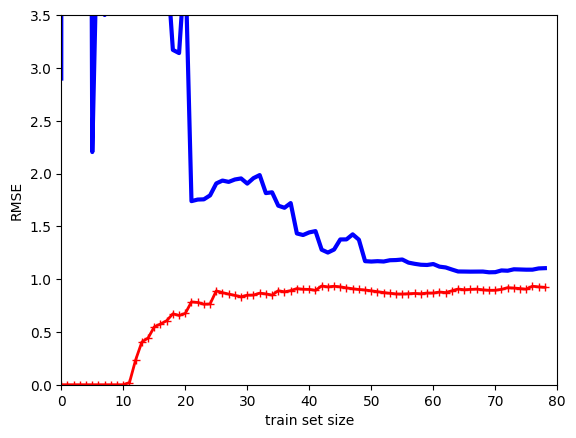

In [ ]:
# 10차 다항 회귀 모델의 학습 곡선

from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3.5])

- 이전의 학습 곡선과의 차이점
  1. 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
  2. 두 곡선 사이에 공간이 존재
    => 훈련 데이터의 모델 성능이 검증 데이터에서보다 훨씬 높음 = 과대적합 모델의 특징
    - **더 큰 훈련 세트 사용** 시 두 곡선이 점점 가까워짐

**편향/분산 트레이드오프**
- 편항
  - 일반화 오차 중 편향은 잘못된 가정으로 인한 것
    - 예: 실제로는 2차인데, 선형으로 가정
  - 편향이 큰 모델 -> 훈련 데이터에 과소적합되기 쉬움
- 분산
  - 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 발생
  - 자유도가 높은 모델(예: 고차 다항 회귀 모델)은 높은 분산을 가지기 쉬움 -> 훈련 데이터에 과대적합되기 쉬움
- 줄일 수 없는 오차(irreducible error)
  - 데이터 자체에 있는 잡음 때문에 발생
  - 이 오차를 줄이기 위한 유일한 방법: 데이터에서 잡음 제거
- 모델의 복잡도가 커지면 통상적으로 분산: up, 편향: down
- 모델의 복잡도가 줄어들면 편향 up, 분산: down

## **4.5 규제가 있는 선형 모델**

- 자유도를 줄이면 데이터에 과대적합되기 어려워짐
  - 다항 회귀 모델을 규제하는 간단한 바법: 다항식의 차수 감소
- 선형 회귀 모델에서는 보통 모델의 가중치 제한 -> 규제

### **4.5.1 릿지 회귀**

- 릿지(ridge) 회귀: 규제항 $α\sum^n_{i=1}\theta^2_i$이 비용 함수에 추가된 선형 회귀
  - 학습 알고리즘을 데이터에 맞추기 + 모델의 가중치가 가능한 한 작게 유지되도록 노력
  - 규제항: 훈련하는 동안에만 비용 함수에 추가
    - 모델 훈련이 끝나면 성능을 규제가 없는 성능 지표로 평가
  - 하이퍼파라미터 α: 모델을 얼마나 많이 규젲할지 조절
    - α=0: 선형 회귀와 동일
    - 매우 큰 α: 모든 가중치가 거의 0에 가까워짐 => 데이터의 평균을 지나는 수평선
  - 릿지 회귀의 비용 함수
  $$J(\theta)=MSE(\theta)+α\frac{1}{2}\sum^n_{i=1}\theta^2_i$$
    - 편향 $\theta_0$는 규제되지 X
    - 𝐖: 특성의 가중치 벡터($\theta_1$~$\theta_n$)
    - 규제항: $\frac{1}{2}(\lVert 𝐰\rVert_2)^2$
    - $\lVert ⋅\rVert_2$: 가중치 벡터의 $ℓ_2$ norm
    - 경사하강법에 적용하려면 MSE gradient vector에 α𝐰 더하기
- 릿지 회귀는 입력 특성의 스케일에 민감 => `StandardScaler` 등을 사용하여 스케일 맞추는 것이 중요
  
  (대부분의 규제 모델에 해당)

- α값에 따른 릿지 모델 훈련 결과

  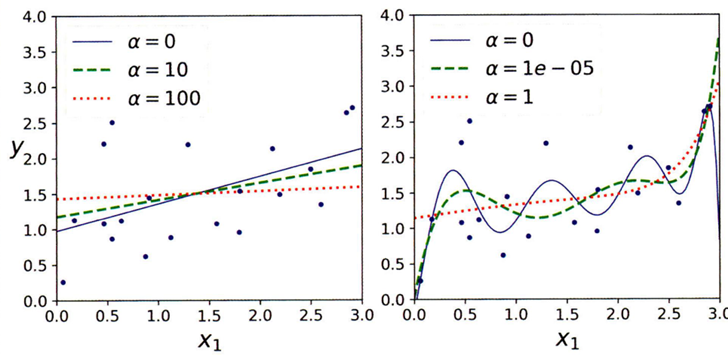
  - 왼쪽: 평범한 릿지 모델을 사용한 선형적인 예측
  - 오른쪽: `PolynomialFeatures(degree=10)`을 사용해 데이터 확장 -> `StandardScaler로` 스케일 조정 후 릿지 모델 적용

    = 릿지 규제를 사용한 다항 회귀
  - α값 증가할수록 직선에 가까워짐
    - 모델의 분산 down, 편향 up

- 선형 회귀와 마찬가지로 릿지 회귀 계산을 위해 정규방정식 or 경사 하강법 사용 가능
  - 릿지 회귀의 정규방정식

$$\widehat \theta=(X^TX+\alpha A)^{-1}X^Ty$$

In [ ]:
# 정규방정식을 사용한 릿지 회귀 적용

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.59447587]])

In [ ]:
# 확률적 경사 하강법 사용

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.57986506])

- `penalty`: 사용할 규제 지정
  - `'l2'`: SGD가 비용 함수에 가중치 벡터의 $ℓ_2$ norm의 제곱을 2로 나눈 규제항 추가 = 릿지 회귀

### **4.5.2 라쏘 회귀**

- 라쏘(Lasso) 회귀: 규제항으로 가중치 벡터의 $ℓ_1$ norm 사용
  - 라쏘 회귀의 비용 함수
  $$J(\theta)=MSE(\theta)+α\sum^n_{i=1}\lvert\theta_i\rvert$$
- 라쏘 규제를 사용한 선형 회귀(왼쪽), 다항 회귀(오른쪽)의 α값에 따른 비교

  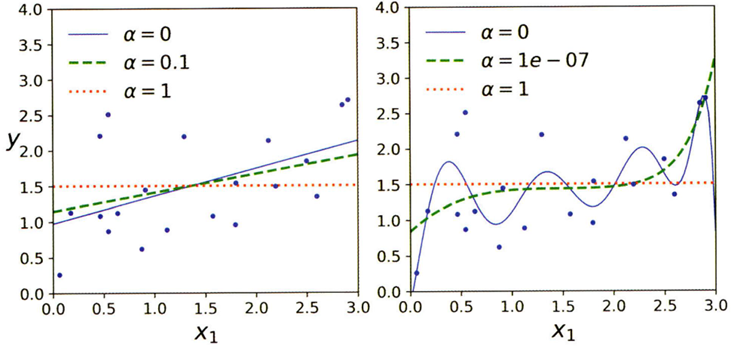

- 라쏘 회귀의 특징: 덜 중요한 특성의 가중치 제거(가중치=0)
  - 예: 오른쪽 그래프의 점선(α=$10^{-7}$)은 2차방정식처럼 보이며 거의 선형적
      - 차수가 높은 다항 특성의 가중치가 모두 0이 됨
  - 자동으로 특성 선택을 하고 희소 모델(sparse model) 만듦
- 라쏘 규제와 릿지 규제 비교

  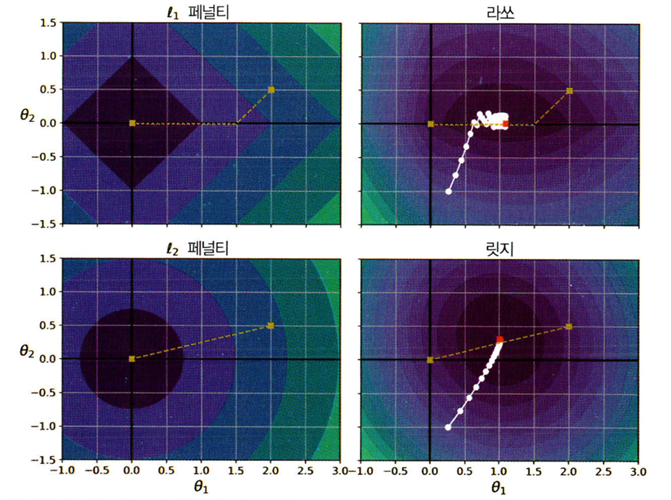

- subgradient vector 𝐠를 사용하면 경사 하강법 적용에 문제 X
- 라쏘 회귀의 subgradient vector

  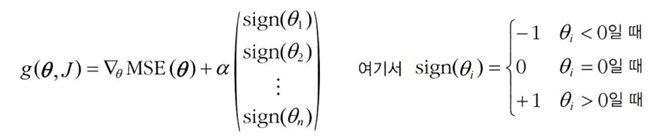

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) # SGDRegressor(penalty='l1)을 사용해도 ok
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.54392003])

### **4.5.3 엘라스틱넷**

- 엘라스틱넷(elastic net): 릿지 회귀와 라쏘 회귀 절충
  - 규제항: 릿지와 라쏘의 규제항을 더해서 사용
  - 혼합 비율 𝐫: 혼합 정도 조절
    - 𝐫=0: 릿지 회귀와 동일
    - 𝐫=1: 라쏘 회귀와 동일
  - 엘라스틱넷 비용 함수
  $$J(\theta)=MSE(\theta)+𝐫α\sum^n_{i=1}\lvert\theta_i\rvert+\frac{1-r}{2}\alpha\sum^n_{i=1}\theta^2_i$$
- 일반적으로 평범한(규제가 없는) 선형 회귀 사용은 지양
  - 릿지가 기본이 되지만, 쓰이는 특성이 몇 개뿐이라고 의심되는 경우 라쏘나 엘라스틱넷 사용
  - 특성 수가 훈련 샘플 수보다 많거나, 특성 몇 개가 강하게 연관된 경우: 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷 선호

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.55186955])

### **4.5.4 조기 종료**

- 조기 종료(early stopping): 검증 에러가 최솟값에 도달하면 바로 훈련 중지
  - 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 방식
- 배치 경사 하강법으로 훈련시킨 복잡한 모델(고차원 다항 회귀)

  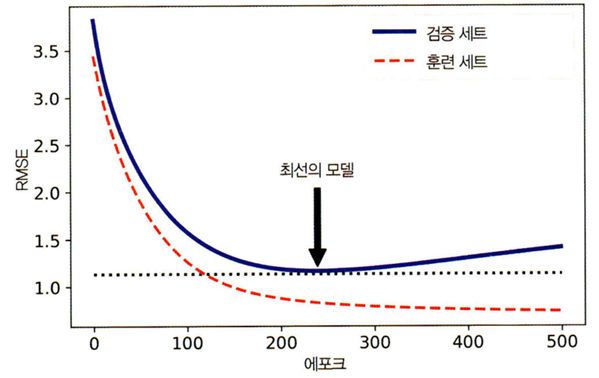
  - 에포크 진행됨에 따라 훈련&검증 세트에 대한 예측 에러(RMSE) 감소
  - 감소하던 중, 검증 에러가 멈추었다가 다시 상승 = 훈련 데이터에 과대적합되기 시작
  - 조기 종료 -> 검증 에러가 최소에 도달하는 즉시 훈련 멈춤
- 확률적/미니배치 경사 하강법: 곡선이 매끄럽지 않아 최솟값에 도달했는지 확인하기 어려울 수 있음
  - 해결법: 검증 에러가 일정 시간 동안 최솟값보다 클 때(모델이 더 나아지지 않는다는 확신이 들 때),
    
    학습 멈추고 검증 에러가 최소였을 때의 모델 파라미터로 되돌리기

In [78]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# 데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # 훈련 이어서 진행
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

- `warm_start = True`로 지정 -> `fit()` 호출될 때 처음부터 다시 시작(X), 이전 모델 파라미터에서 훈련 이어감

## **4.6 로지스틱 회귀**
- 로지스틱 회귀(logistic regression): 샘플이 특정 클래스에 속할 확률 추정에 사용
  - 추정 확률 > 50% : 샘플이 해당 클래스에 속한다고 예측 = 양성 클래스
  - 추정 확률 $\leq$ 50% : 샘플이 해당 클래스에 속하지 않는다고 예측 = 음성 클래스

  => 이진 분류기

### **4.6.1 확률 추정**

- 로지스틱 회귀의 작동 원리
  - 선형 회귀 모델과 같이 입력 특성의 가중치 합을 계산(-> 편향 더하기)
  - But, 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱(logistic) 출력
  - 로지스틱 회귀 모델의 확률 추정(벡터 표현식)
  $$\widehat p = h_\theta(x)=\sigma(\theta^T x)$$
    - 로지스틱(σ(⋅)): 0~1 값을 출력하는 시그모이드 함수 (S자 형태)
    - $\sigma(t)=\frac{1}{1+exp(-t)}$

  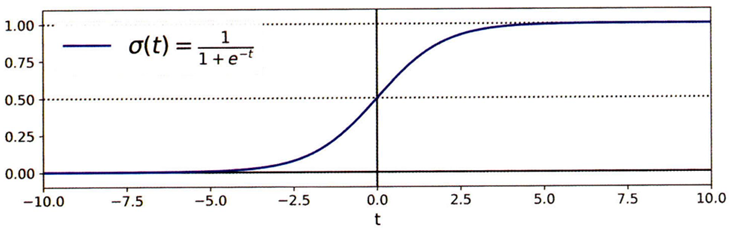

- 로지스틱 회귀 모델이 샘플 x가 양성 클래스에 속할 확률을 추정하면 이에 대한 예측을 쉽게 구할 수 있음

  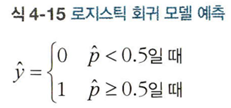

### **4.6.2 훈련과 비용 함수**

- 훈련의 목적: 양성 샘플(y=1) -> 높은 확률 추정, 음성 샘플(y=0) -> 낮은 확률 추정하는 모델의 파라미터 벡터 ***Θ*** 찾기
  - 하나의 훈련 샘플 x에 대해 나타낸 비용 함수

    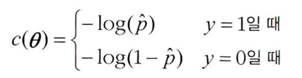
    - t가 0에 가까워지면 -log(t)가 매우 커짐
      
      => 양성 샘플을 0에 가까운 확률로 추정 or 음성 샘플을 1에 가까운 확률로 추정하면 비용이 크게 증가
  - 전체 훈련 세트에 대한 비용 함수: 모든 훈련 샘플의 비용을 평균 = 로그 손실(log loss)

    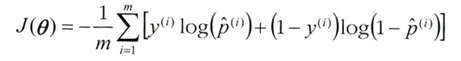

- 비용 함수의 최솟값을 계산하는 알려진 해(like 정규방정식) X
  - But, 볼록 함수이므로 경사 하강법(or 다른 최적화 알고리즘)이 전역 최솟값 찾는 것을 보장
- 로지스틱 비용 함수의 편도함수
  
  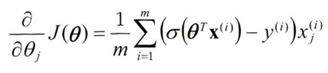
  - 각 샘플에 대해 예측 오차 계산, j번째 특성값을 곱해서 모든 훈련 샘플에 대해 평균
  - 모든 편도함수를 포함한 gradient vector를 만들면 배치 경사 알고리즘 사용

### **4.6.3 결정 경계**

In [79]:
# 데이터 로드

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [80]:
X = iris['data'][:,3:] # 꽃잎의 너비
y = (iris['target']==2).astype(int)

In [81]:
# 로지스틱 회귀 모델 훈련

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

Text(0, 0.5, 'probability')

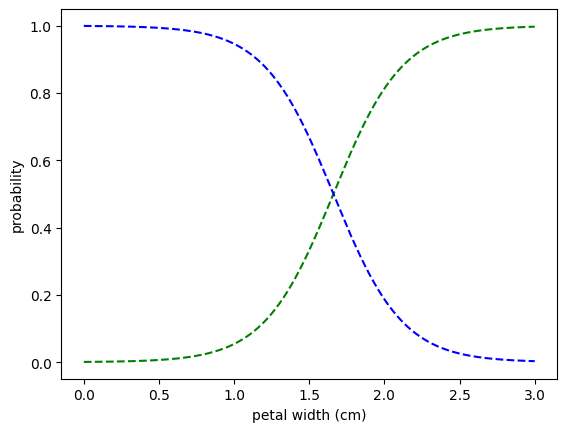

In [91]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g--', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris virginica')
plt.xlabel('petal width (cm)')
plt.ylabel('probability')

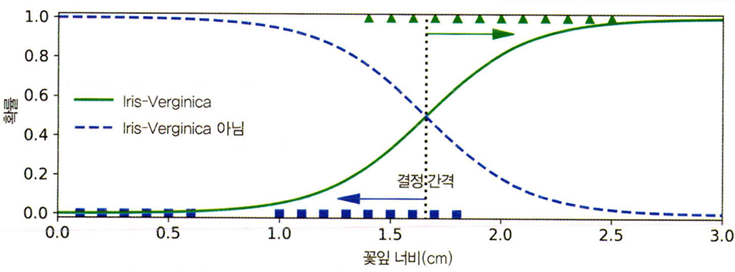
- Verginica(삼각형): 1.4~2.5cm에 분포
- 다른 붓꽃(사각형): 0.1~1.8cm에 분포
  - 약간의 중첩되는 부분
- 2cm 이상: 분류기가 Verignica라고 강하게 확신(높은 확률)
- 1cm 아래: Verginica 아니라고 강하게 확신
- 두 극단 사이: 분류가 확실하지 않음

  => 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정 경계(decision boundary) 생성

In [92]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

- 1.6cm보다 크면(1.7) Verginica로
- 그보다 작으면(1.5) 아니라고 예측

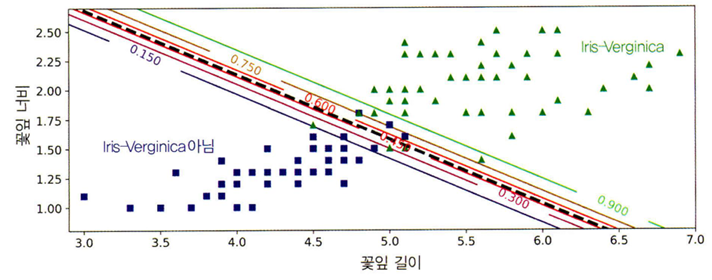
- 꽃잎 너비와 꽃잎 길이 2개의 특성으로 보여줌
- 점선: 모델이 50% 확률 추정 = 모델의 결정 경계 -> ⭐선형⭐
- 15%(왼쪽 아래)~90%(오른쪽 위)까지의 수평한 직성: 모델이 특정 확률을 출력하는 포인트

- 로지스틱 회귀 모델도 L1, L2 페널티를 사용한 규제 O
  - 사이킷런: L2 페널티 default
  - C: 규제 강도 조절 하이퍼파라미터(alpha의 역수에 해당) => C가 클수록 규제 감소

### **4.6.4 소프트맥스 회귀**

- 소프트맥스 회귀(다항 로지스틱 회귀): 로지스틱 회귀 모델에서 다중 클래스를 지원하도록 일반화
  - 샘플 x가 주어지면 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 $s_k(x)$ 계산
    - 계산식: $s_k(x)=(\theta^{(k)})^T x$
    - 각 클래스의 파라미터 벡터 $\theta^{(k)}$ -> 파라미터 행렬 𝜣에 행으로 저장
  
    -> 소프트맥스 함수(정규화된 지수 함수) 적용
    
    => 클래스 k에 속할 확률 $\widehat p_k$ 추정
- 소프트맥스 함수
$$\widehat p_k=\sigma(s(x))_k=\frac{exp(s_k(x))}{\sum^k_{j=1}exp(s_j(x))}$$
  - K: 클래스 수
  - s(x): 샘플 x에 대한 각 클래스의 점수를 담은 벡터
  - $\sigma(s(x))_k$: 샘플 x가 클래스 k에 속할 추정 확률
- 추정 확률이 가장 높은 클래스를 선택하여 예측

  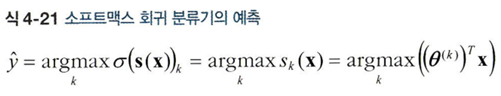

- 소프트맥스 훈련 방법
  - 목적: 타깃 클래스에 대해 높은 확률을 추정하도록 만들기
  - 크로스 엔트로피: 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도

    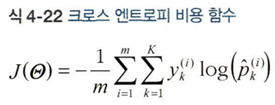
  - 크로스 엔트로피 비용 함수 최소화 -> 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제
  - gradient vector

    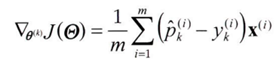

In [93]:
X = iris['data'][:, (2,3)] # 꽃잎 길이, 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [94]:
softmax_reg.predict([[5,2]])

array([2])

In [95]:
softmax_reg.predict_proba([[5,2,]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

- 만들어진 결정 경계

  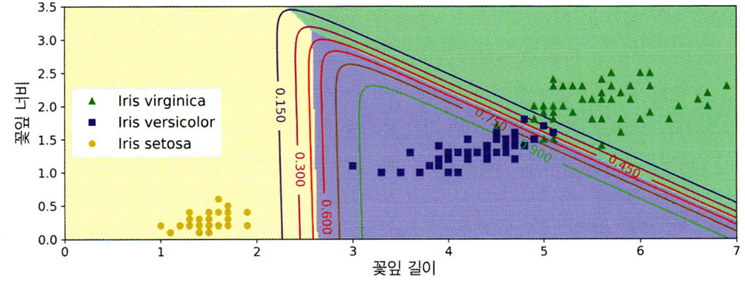
  - 클래스 사이의 결정 경계가 모두 선형
  - Versicolor 클래스에 대한 확률을 곡선으로 표현